# Компьютерные игры

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import warnings
from scipy.stats import bartlett
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv('')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

В таблице десять столбцов. Тип данных — object, float.

Согласно документации к данным:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


В названии колонок видно нарушения стиля (использование заглавных букв). Необходимо поправить стиль. 

Столбец с годом релиза имеет тип данных float, хотя в этом нет необходимости. Есть пропущенные значения типа Nan - необходимо заменить подходящим образом или удалить. Пропуски есть в столбцах Name, Year_of_Release, Genre, Critic_Score (больше всего), User_Score, Rating. 

Предварительно можно утверждать, что данных достаточно для проведения исследовательского анализа данных. Но чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

In [5]:
#приведение столбцов к нужному регистру 
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#обработка пропусков
df.isna().sum() #подсчет количества пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Считаю, что строки с пропусками в слобцах 'name', 'year_of_release', 'genre' можно удалить, так как их количество незначительно по сравнению с общим объемом данных. Пропуски могли появиться в результате выгрузки данных. 

In [7]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропуски в critic_score, user_score и rating решила не удалять, так как заполнение их чем-либо может исказить дальнейший анализ. Пропуски в этих столбцах появились, вероятно, из-за того, что не все люди заполняют рейтинг игр, не все игры могли быть оценены критиками и выставлен рейтинг. 

In [8]:
#необходимо разобраться с обозначениями в столбце 'rating'
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Из информации в интеренете выяснено, что
* EC («Early childhood») — Для детей младшего возраста
* E («Everyone») — Для всех
* E10+ («Everyone 10 and older») — Для всех от 10 лет и старше
* T («Teen») — Подросткам
* M («Mature») — Для взрослых
* AO («Adults Only 18+») — Только для взрослых
* RP («Rating Pending») — Рейтинг ожидается
* K-A - Для детей и взрослых

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#в столбце 'user_score' обнаружено значение 'tbd' - это сокращение произошло от выражения «to be determined”
#что можно перевести на русский, как «быть определённым». Для дальнейшего анализа его следует заменить на NaN.
df['user_score'] = df['user_score'].replace(['tbd'], float('nan'))

In [11]:
df['user_score'].unique() #проверка значений

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [12]:
#Далее следует заменить типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
#Год не может быть дробным числом
df['year_of_release'] = df['year_of_release'].astype('int')
#Столбцы 'user_score' и 'rating' также слудеут привести к типу float, так как числа не могут быть типом object
df['user_score'] = df['user_score'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
#проверка наличия дубликатов
df.duplicated().sum()

0

In [16]:
#Далее нужно посчитать суммарные продажи во всех регионах
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В ходе предобработки данных изменены названия столбов, удалена часть пропусков, остальные пропуски решено не удалять. Изучены значения в столбце 'rating'. В столбце 'user_score' обнаружено значение 'tbd' и заменено на NaN. Заменены типы данных. Проверено наличие дубликатов, посчитаны суммарные продажи во всех регионах. Далее можно приступать к анализу данных. 

## Исследовательский анализ данных

In [17]:
#посчитано, сколько игр выпущено в разные года
df_group_year = df.groupby('year_of_release')['name'].count()
df_group_year.head()

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

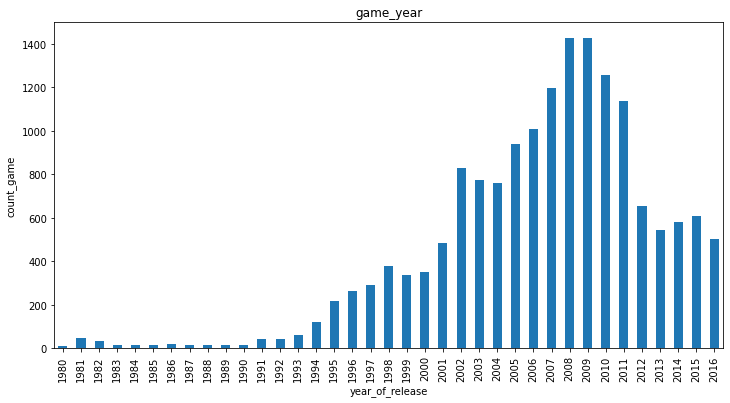

In [18]:
df_group_year.plot(y='name', kind='bar', title ='game_year', figsize = (12,6))
plt.ylabel('count_game') 
plt.show()

Больше всего игр выпускалось с 2005 по 2011 года, затем произошел спад. Я считаю, что данные за все периоды не важны, так как есть очень старые данные, которые не соответствуют современной реальности. Стоит обратить внимание, что количество выпущеных игр в год за последние 5 лет (с 2012 года) распределены достаточно равномерно.

In [19]:
#чтобы посмотреть, как менялись продажи по платформам, необходимо сгруппировать данные и выбрать платформы с наибольшими продажами
top_ten = df.groupby('platform').agg({'sum_sales': 'sum'}).sort_values(by = 'sum_sales', ascending = False).head(10).index
top_ten

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

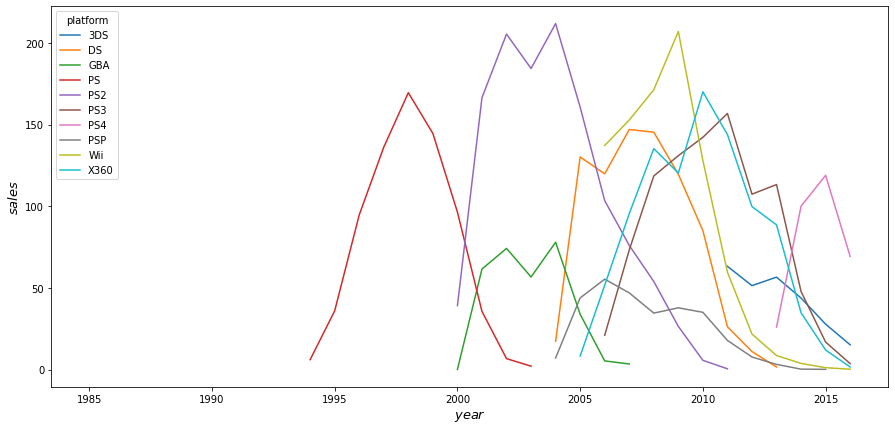

In [20]:
#построим распределения по годам
#отсортировала исходную таблицу
df_top = df.query('platform in @top_ten')
#составлена сводная таблица и по ней построен график
df_top_pivot = df_top.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum' )
df_top_pivot.plot(figsize=(15, 7))
plt.xlabel(r'$year$', fontsize=13)
plt.ylabel(r'$sales$', fontsize=13)
plt.show()


In [21]:
#сгруппирую исходную таблицу по платформе и году, посчитаю продажи
df_group_platform= df_top.groupby(['platform', 'year_of_release']).agg({'sum_sales':'sum'}).reset_index()
df_group_platform.head()

,platform,year_of_release,sum_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


In [22]:
#найдем время жизни платформ и через какое время она достигает максимум продаж
head_year = 0
live_time_list = 0
for elem in top_ten:
    current_platform = df_group_platform.query('platform == @elem')
    live_time = current_platform['year_of_release'].max() - current_platform['year_of_release'].min()
    live_time_list += live_time 
    
    top_sale = current_platform['sum_sales'].max()
    head = current_platform[current_platform['sum_sales'] == top_sale]['year_of_release'].values[0] - current_platform['year_of_release'].min()
    head_year += head
    
live_time_mean = live_time_list/10
head_year_mean = head_year/ 10    
print(f'Среднее время жизни платформ {live_time_mean} лет,  в среднем максимум продаж через {head_year_mean}')

Среднее время жизни платформ 10.5 лет,  в среднем максимум продаж через 5.1


In [23]:
aсt_time = int(live_time_mean /2)
aсt_time

5

Из расчетов можно сделать вывод, что платформы появляются и исчезают в среднем за 10 лет, достигая максимума продаж за 5 лет.  За актуальный период можно взять половину времени жизни платформы, которое равно 5. Соответственно, данные необходимо взять с 2012 года включительно.

In [24]:
#возьмем данные за актуальный период 
df_act = df.query('year_of_release >= 2012')
df_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79


In [25]:
#составлена сводная таблица
df_act_pivot = df_act.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
df_act_pivot


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


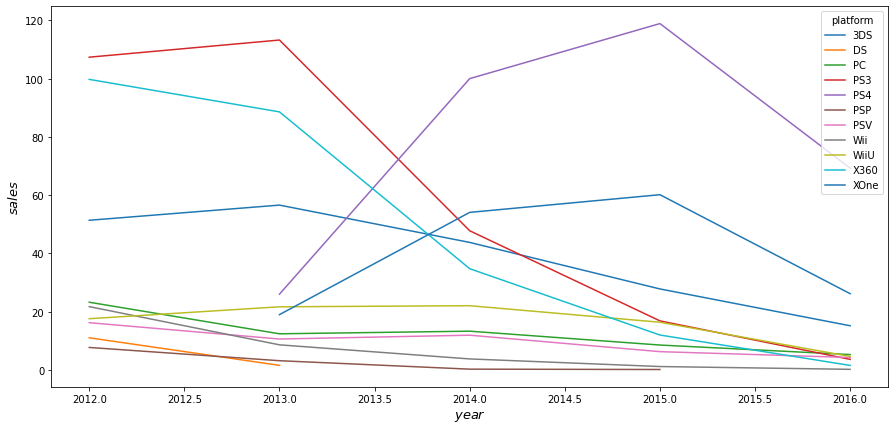

In [26]:
df_act_pivot.plot(figsize=(15, 7))
plt.xlabel(r'$year$', fontsize=13)
plt.ylabel(r'$sales$', fontsize=13)
plt.show()

Из таблицы и графика можно сделать вывод, что наиболее перспективные платформы (лидируют по продажам и при этом растут) - это PS4 и XOne. У графиков этих платформ наблюдается рост, а в 2016 году падение, но оно обусловлено тем, что за 2016 год данные не полные. В качестве еще одной перспективной платформы можно рассмотреть 3DS. У данной платформы не такие большие продажи, но она появилась только в 2013 году и возможен рост. Также высокие продажи емть у платформ PS3 и X360, но на графике для них наблюдается значительное падение последние 3 года, поэтому перспективными их считать нельзя. 

In [27]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
#Для этого сначала отсортирую таблицу за актуальный период, оставив только перспективные платформы.

promising_platforms = ['PS4', 'XOne', '3DS']
df_promising = df_act[df_act['platform'].isin(promising_platforms)]
df_promising.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.00,7.20,E,9.90


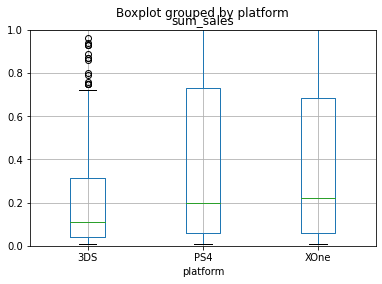

In [28]:
#построение графика
df_promising.boxplot(column='sum_sales', by = 'platform')
plt.ylim(0,1) #установлен предел, так как важно рассмотреть медиану
plt.show()

Из графика "ящик с усами" видно, что на платформах PS4 и XOne игры продаются в среднем одинаково, а на 3DS игры продаются в среднем немного меньше. Вывод сделан исходя из медианных значений. Но исходя из значений 3 квантиля для платформ, можно сделать вывод, что разброс распределения величины продаж у  PS4 и XOne значительно выше, чем у 3DS. Следовательно, у PS4 и XOne есть большое колличество игр, продажи которых значительно превышают медианные.

Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы. Для анализа возьмем платформу PS4 (у нее самые большие суммарные продажи).

In [29]:
#вынесу в отдельную таблицу данные по PS4 на актуальный период
one = 'PS4'
df_act_PS4 = df_promising.query('platform == @one')

Коэффициент кореляции: -0.03


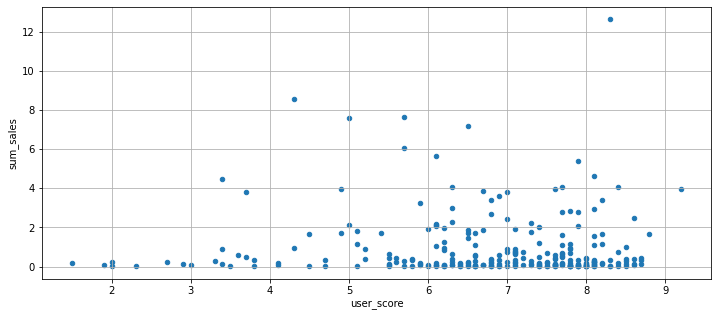

In [30]:
#зависимость продаж от оценки пользователей 
print('Коэффициент кореляции:', df_act_PS4['sum_sales'].corr(df_act_PS4['user_score']).round(2))
#построение диагаммы рассеяния
df_act_PS4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, figsize=(12, 5) )
plt.show()

Коэффициент кореляции: 0.41


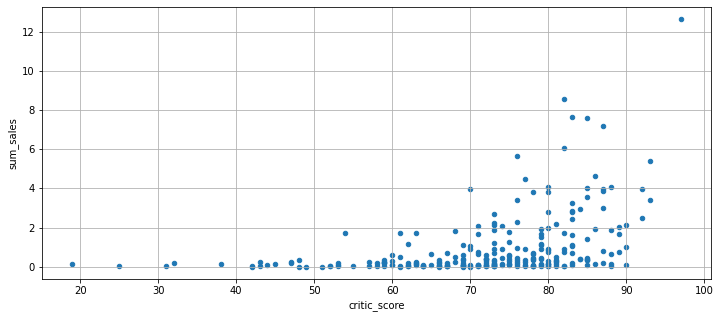

In [31]:
#зависимость продаж от оценки критиков
print('Коэффициент кореляции:', df_act_PS4['sum_sales'].corr(df_act_PS4['critic_score']).round(2))
#построение диагаммы рассеяния
df_act_PS4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, figsize=(12, 5) )
plt.show()

Исходя из значений коэффициентов корреляции и построеных графиков можно сделать вывод, что продажи не зависят от оценок пользователей, но наблюдается умеренная корреляционная связь (по таблице Чеддока) от оценок критиков. Чем выше оценка критика, тем больше продажи.

Коэффициент кореляции от оценки пользователей для PS3: -0.01
Корреляции нет


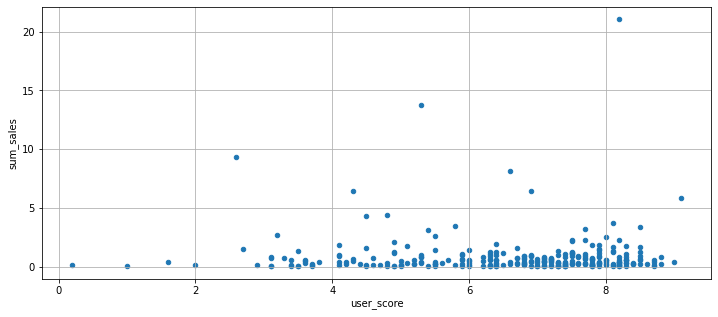

Коэффициент кореляции от оценки пользователей для X360: 0.01
Корреляции нет


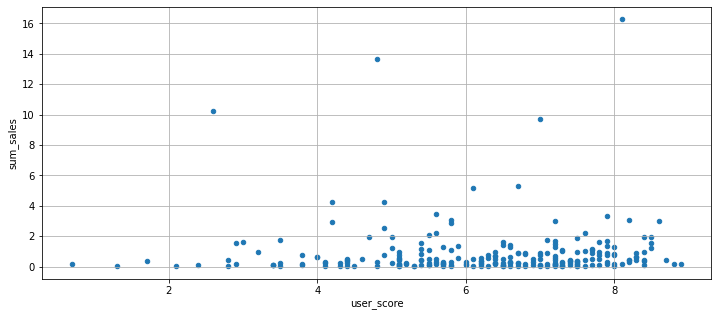

Коэффициент кореляции от оценки пользователей для PS4: -0.03
Корреляции нет


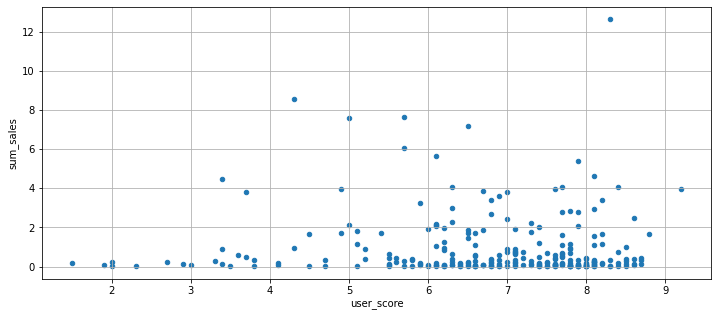

Коэффициент кореляции от оценки пользователей для 3DS: 0.2
Корреляции нет


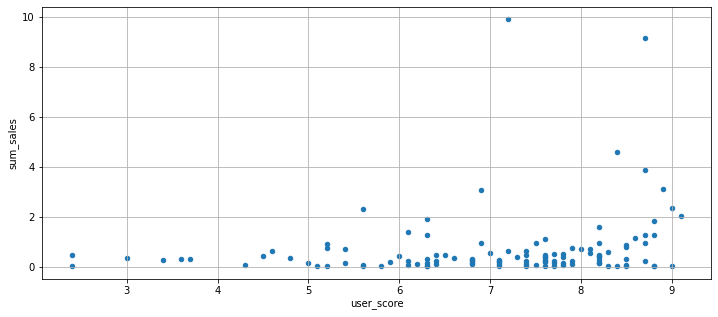

Коэффициент кореляции от оценки пользователей для DS: 0.88
Корреляция высокая


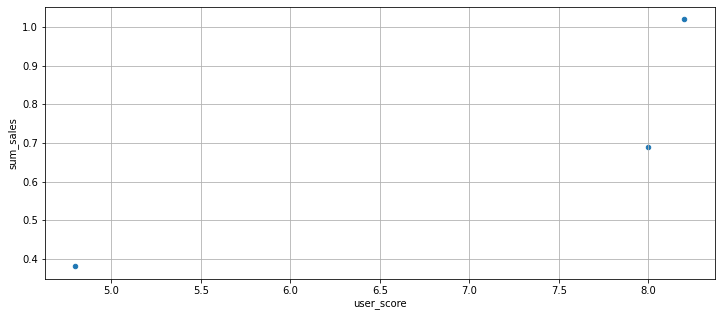

Коэффициент кореляции от оценки пользователей для XOne: -0.07
Корреляции нет


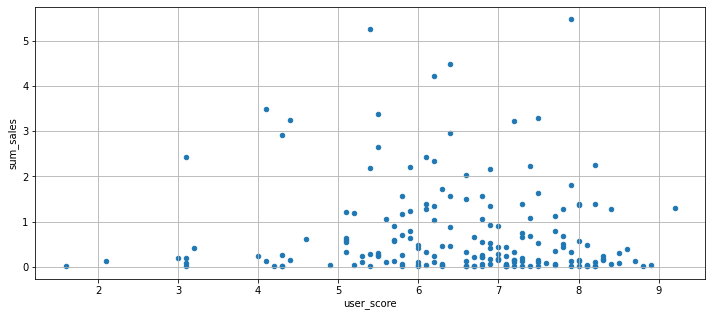

Коэффициент кореляции от оценки пользователей для WiiU: 0.4
Корреляция умеренная


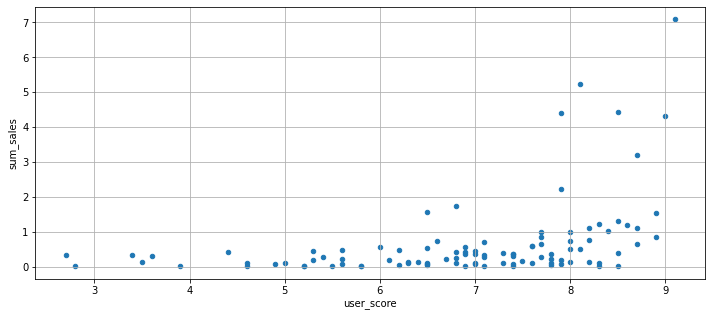

Коэффициент кореляции от оценки пользователей для Wii: 0.3
Корреляция умеренная


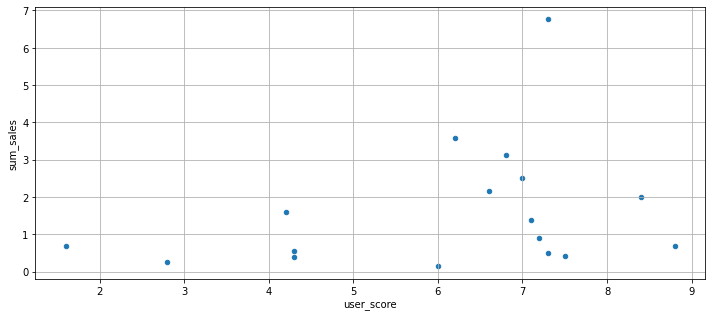

Коэффициент кореляции от оценки пользователей для PC: -0.12
Корреляции нет


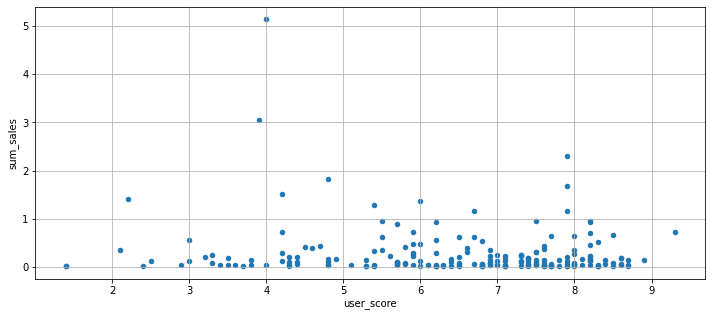

Коэффициент кореляции от оценки пользователей для PSV: -0.0
Корреляции нет


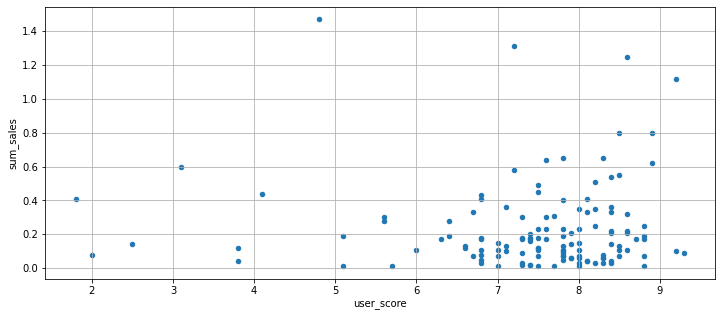

Коэффициент кореляции от оценки пользователей для PSP: -0.8
Корреляция высокая


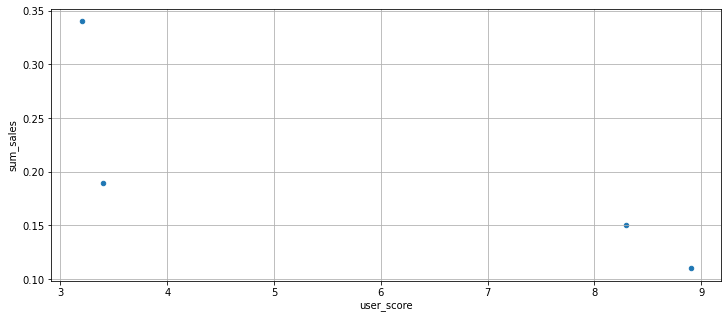

In [32]:
#Соотнесем выводы с продажами игр на других платформах
#Зависимость продаж от оценки пользователей

for elem in df_act['platform'].unique():
    df_elem = df_act.query('platform == @elem')
    koef = df_elem['sum_sales'].corr(df_elem['user_score']).round(2)
    print(f'Коэффициент кореляции от оценки пользователей для {elem}: {koef}')
    if abs(koef) < 0.3:
        print('Корреляции нет')
    elif 0.3 <= abs(koef) < 0.5:
        print('Корреляция умеренная')
    elif 0.5 <= abs(koef) < 0.7:
        print('Корреляция заметная')
    elif 0.7 <= abs(koef) <= 1:
        print('Корреляция высокая')    
    else:
        print('Нельзя оценить')    
    df_elem.plot(x='user_score', y='sum_sales', kind='scatter', grid=True, figsize=(12, 5) )
    plt.show()

Для большинства остальных платформ вывод подтвердился: продажи не зависят от оценки пользователей. Для платформ DS и PSP значение коэффициента корреляции коворят о наличии высокой корреляции, однако данных для этих платформ за актуальный период очень мало и расчет нельзя считать достоверным. А для платформ WiiU и Wii расчеты говорят об умеренной корреляции и данных для анализа достаточно много. Предположительно, для этих платфрм действительно наблюдается легкая зависимость.

Коэффициент кореляции от оценки критиков для PS3: 0.33
Корреляция умеренная


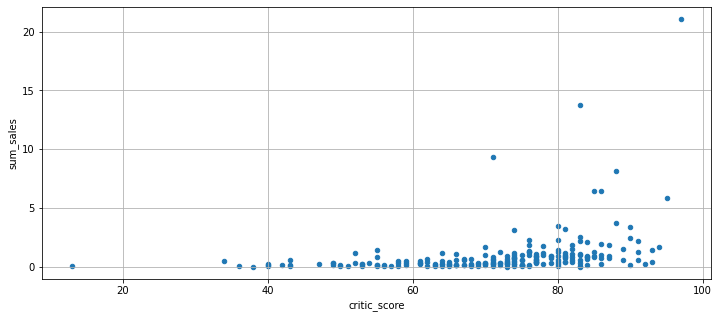

Коэффициент кореляции от оценки критиков для X360: 0.36
Корреляция умеренная


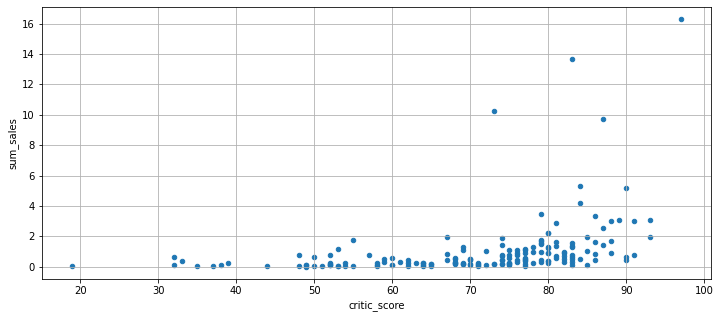

Коэффициент кореляции от оценки критиков для PS4: 0.41
Корреляция умеренная


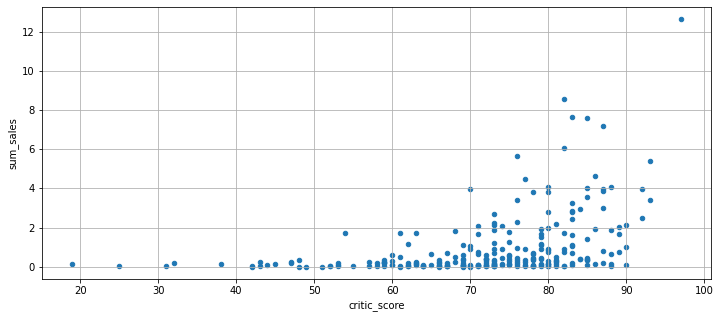

Коэффициент кореляции от оценки критиков для 3DS: 0.32
Корреляция умеренная


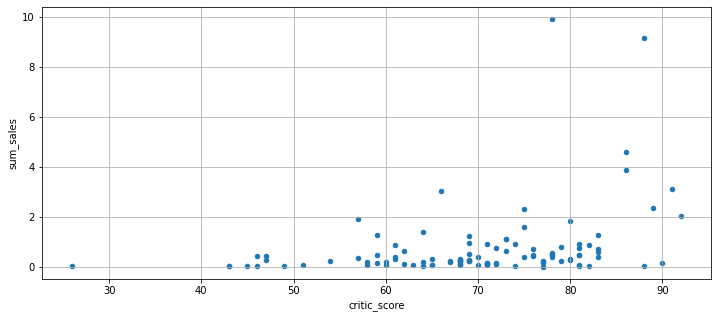

Коэффициент кореляции от оценки критиков для DS: nan
Нельзя оценить


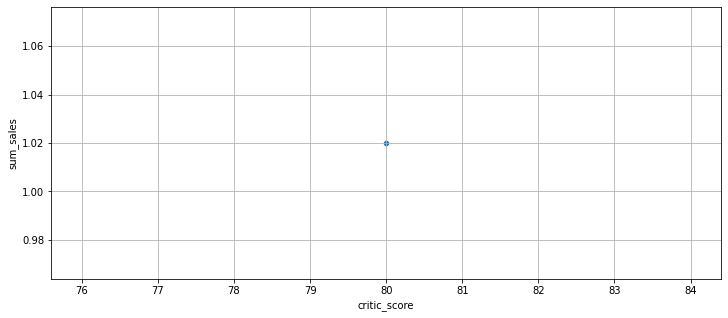

Коэффициент кореляции от оценки критиков для XOne: 0.42
Корреляция умеренная


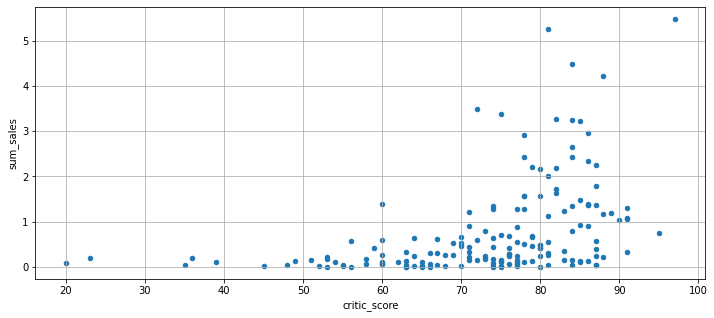

Коэффициент кореляции от оценки критиков для WiiU: 0.35
Корреляция умеренная


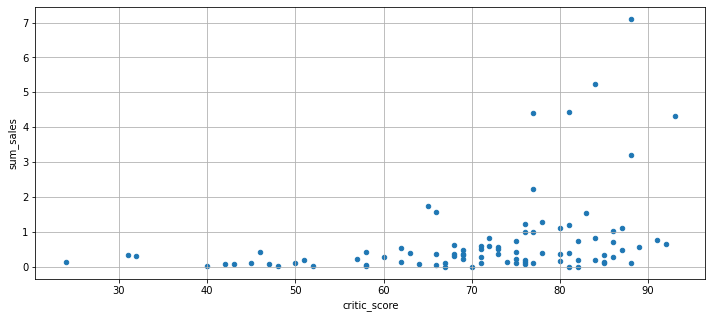

Коэффициент кореляции от оценки критиков для Wii: -0.42
Корреляция умеренная


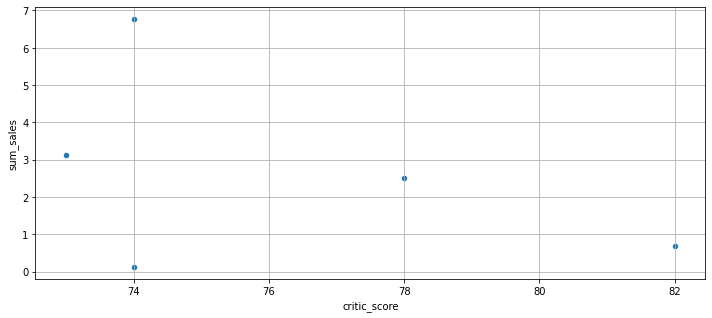

Коэффициент кореляции от оценки критиков для PC: 0.24
Корреляции нет


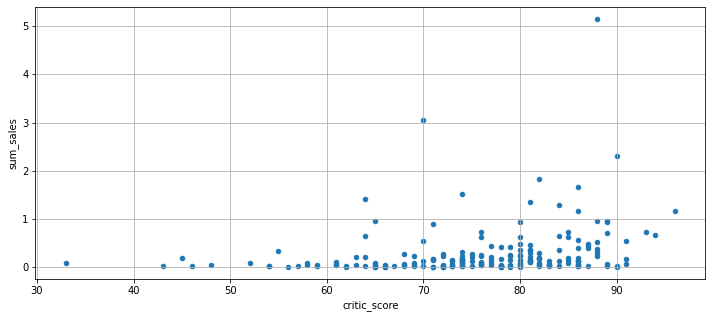

Коэффициент кореляции от оценки критиков для PSV: 0.09
Корреляции нет


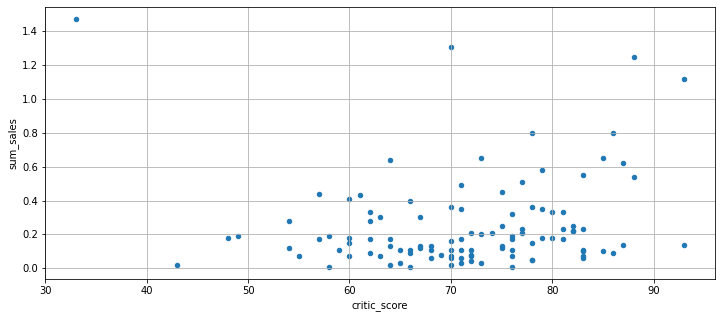

Коэффициент кореляции от оценки критиков для PSP: nan
Нельзя оценить


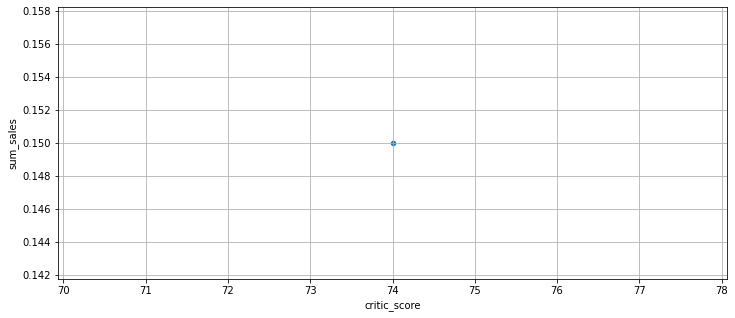

In [33]:
#Зависимость продаж от оценки критиков

for elem in df_act['platform'].unique():
    df_elem = df_act.query('platform == @elem')
    koef = df_elem['sum_sales'].corr(df_elem['critic_score']).round(2)
    print(f'Коэффициент кореляции от оценки критиков для {elem}: {koef}')
    if abs(koef) < 0.3:
        print('Корреляции нет')
    elif 0.3 <= abs(koef) < 0.5:
        print('Корреляция умеренная')
    elif 0.5 <= abs(koef) < 0.7:
        print('Корреляция заметная')
    elif 0.7 <= abs(koef) <= 1:
        print('Корреляция высокая')    
    else:
        print('Нельзя оценить')  
    df_elem.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, figsize=(12, 5) )
    plt.show()

Для большинства остальных платформ вывод подтвердился: наблюдается умеренная корреляционная связь от оценок критиков.
Для платформ DS и PSP нельзя оценить корреляцию, для рассчета недостаточно данных. Для платформ PC и PSV расчеты показывают отсутствие корреляции и данных для анализа достаточно много. Предположительно, для этих платформ действительно не наблюдается зависимость.

In [34]:
#посмотрим распределение игр по жанрам 
df_act.groupby('genre')['name'].count().sort_values(ascending = False)

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

Из таблицы видно, что больше всего игр выпускается в жанре 'Action', а меньше всего в жанре 'Puzzle'.

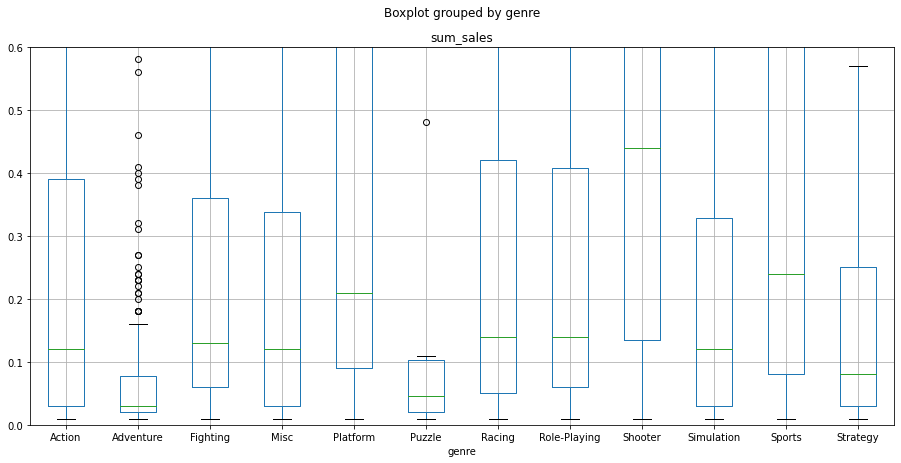

In [35]:
#посмотрим, какой из жанров является самым прибыльным
#построение графика
df_act.boxplot(column='sum_sales', by = 'genre', figsize=(15, 7))
plt.ylim(0,0.6) #утановлен предел, так как важно рассмотреть медиану
plt.show()

Исходя из значений медианных продаж, самым прибыльным жанром является 'Shooter'. Далее идут жанры 'Platform' и 'Sports'. Самые низкие медианные продажи у жанров 'Adventure', 'Puzzle' и 'Strategy'.  

### Вывод

Больше всего игр выпускалось с 2005 по 2011 года, затем произошел спад. Я считаю, что данные за все периоды не важны, так как есть очень старые данные, которые не соответствуют современной реальности.

Платформы появляются и исчезают в среднем за 10 лет, достигая максимума продаж за 5 лет.  За актуальный период можно взять половину времени жизни платформы, которое равно 5 лет. Соответственно, актуальный период -  данные начиная с 2012 года включительно.

Наиболее перспективные платформы (лидируют по продажам и при этом растут) - это PS4, XOne и 3DS.

Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. На гистограмме видно, что на платформах PS4 и XOne игры продаются в среднем одинаково, а на PS4, 3DS игры продаются в среднем немного меньше. 

Для платформы PS4 сделан вывод, что продажи не зависят от оценок пользовательлей, но наблюдается умеренная корреляционная связь (по таблице Чеддока) от оценок критиков. Чем выше оценка критика, тем больше продажи. Для большинства остальных платформ вывод подтвердился: продажи не зависят от оценки пользователей. Для платформ DS и PSP значение коэффициента корреляции говорит о наличии высокой корреляции, однако данных для этих платформ за актуальный период очень мало и рассчет нельзя считать доставерным. А для платформ WiiU и Wii рассчеты говорят об умеренной корреляции и данных для анализа достаточно много. Предположительно, для этих платформ действительно наблюдается легкая зависимость.

Больше всего игр выпускаетмя в жанре 'Action', а меньше всего в жанре 'Puzzle'. Самым прибыльным жанром является 'Shooter'. Далее идут жанры 'Platform' и 'Sports'. Самые низкие медианные продажи у жанров 'Adventure', 'Puzzle' и 'Strategy'.  

## Портрет пользователя каждого региона

In [36]:
#Определим самые популярные платформы (топ-5).

regions = ['na_sales', 'eu_sales', 'jp_sales']

for elem in regions:
    df_act_platf = df_act.groupby('platform')[elem].sum().sort_values(ascending = False).head()
    print(df_act_platf)

platform
X360   140.05
PS4    108.74
PS3    103.38
XOne    93.12
3DS     55.31
Name: na_sales, dtype: float64
platform
PS4    141.09
PS3    106.86
X360    74.52
XOne    51.59
3DS     42.64
Name: eu_sales, dtype: float64
platform
3DS    87.79
PS3    35.29
PSV    21.04
PS4    15.96
WiiU   13.01
Name: jp_sales, dtype: float64


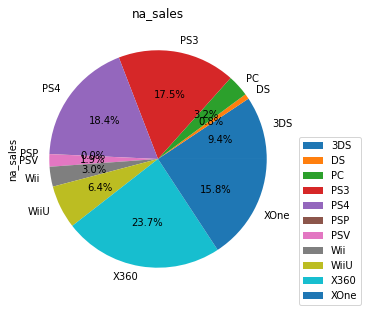

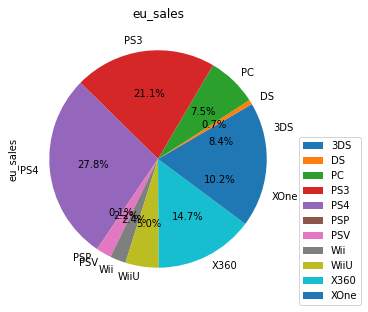

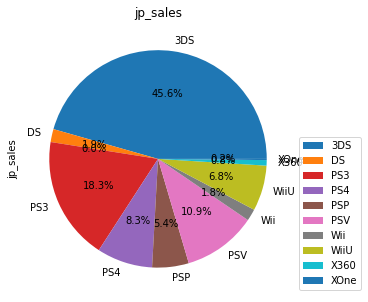

In [37]:
#Различие в долях продаж

regions = ['na_sales', 'eu_sales', 'jp_sales']
df_act_platf = df_act.groupby('platform')[regions].sum()
for elem in regions:
    df_act_platf.plot(y = elem, kind = 'pie', figsize=(12, 5), autopct='%1.1f%%', title=elem)

    plt.legend(bbox_to_anchor=(1, 0.6))    

Исходя из рассчитанных данных: 

Самые популярные платформы в Северной Америке - X360 (23.7%), PS4 (18.4%), PS3 (17.5%), XOne (15.8%) и 3DS (9.4%). 

Самые популярные платформы в Европе - PS4 (27.8%), PS3 (21.1%), X360 (14.7%), XOne (10.2%) и 3DS (8.4%).

Самые популярные платформы в Японии - 3DS (45.6%), PS3 (18.3%), PSV (10.9%), PS4 (8.3%) и WiiU (6.8%).

              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Cамые популярные жанры по продажам в na_sales: Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')
              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Cамые популярные жанры по продажам в eu_sales: Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'], dtype='object', name='genre')
              jp_sales
genre                 
Role-Playing     65.44
Actio

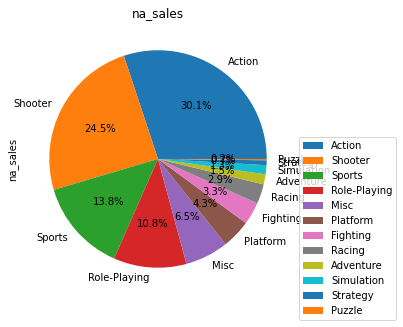

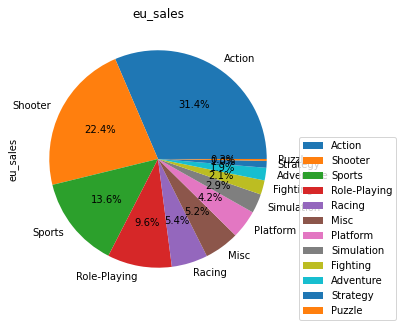

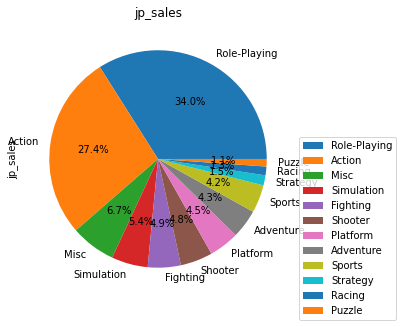

In [38]:
#Самые популярные жанры (топ-5)

regions = ['na_sales', 'eu_sales', 'jp_sales']
for elem in regions:    
    df_act_genre = df_act.groupby('genre').agg({elem : 'sum'}).sort_values( by = elem, ascending = False)
    top = df_act_genre[elem].head().index
    print(df_act_genre)
    df_act_genre.plot(y = elem, kind = 'pie', figsize=(12, 5), autopct='%1.1f%%', title=elem)
    plt.legend(bbox_to_anchor=(1, 0.6))  
    print(f'Cамые популярные жанры по продажам в {elem}: {top}')

Из полученных значений медианных продаж отдельных жанров можно сделать вывод, что (в порядке убывания популярности):

Самые популярные жанры в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc.

Самые популярные жанры в Европе - Action, Shooter, Sports, Role-Playing, Racing.

Самые популярные жанры в Японии - Role-Playing, Action, Misc, Simulation, Fighting.

Данные выводы я делаю исходя из доли проданных игр отдельных жанров по сравнению с общими продажами по региону.


In [39]:
#Чтобы рассмотреть пропущенные значения возрастных рейтингов, заменю пропущенные значенения на 'unknown'
df_act['rating'] = df_act['rating'].fillna('unknown')

         na_sales
rating           
M          231.57
E          114.37
unknown    103.31
E10+        75.70
T           66.02
Список рейтингов по убываю продаж в na_sales: Index(['M', 'E', 'unknown', 'E10+', 'T'], dtype='object', name='rating')
         eu_sales
rating           
M          193.96
E          113.03
unknown     91.50
E10+        55.37
T           52.96
Список рейтингов по убываю продаж в eu_sales: Index(['M', 'E', 'unknown', 'E10+', 'T'], dtype='object', name='rating')
         jp_sales
rating           
unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Список рейтингов по убываю продаж в jp_sales: Index(['unknown', 'E', 'T', 'M', 'E10+'], dtype='object', name='rating')


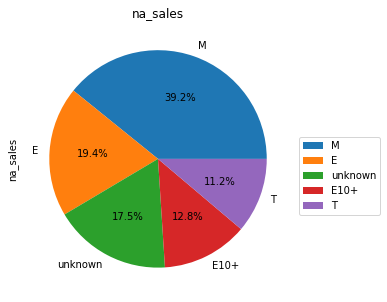

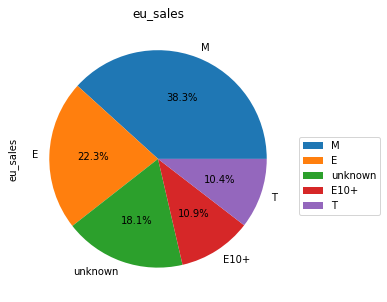

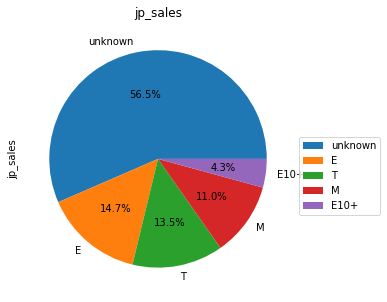

In [40]:
#Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе

regions = ['na_sales', 'eu_sales', 'jp_sales']
for elem in regions:    
    df_act_rating = df_act.groupby('rating').agg({elem : 'sum'}).sort_values( by = elem, ascending = False)
    top = df_act_rating[elem].index
    print(df_act_rating)
    df_act_rating.plot(y = elem, kind = 'pie', figsize=(12, 5), autopct='%1.1f%%', title=elem)
    plt.legend(bbox_to_anchor=(1, 0.6))  
    print(f'Список рейтингов по убываю продаж в {elem}: {top}')

Из графиков выше видно, что в Северной Америке и Европе жанры по продажам распределены так: 

M (для взрослых), E (для всех), E10+ (для всех от 10 лет и старше), T (подросткам). Наиболее популярны игры для взросылых и для всех. 

А в Японии картина резко меняется на: 

E (для всех), T (подросткам), M (для взрослых), E10 (для всех от 10 лет и старше). Наиболее популярны игры для всех и для подростков. 

Из этого можно сделать вывод, что рейтинг ESRB влияет на продажи. Также в регионах продажи в зависимости от рейтинга различаются. 

Для Северной Америке и Европе доля продаж игр с пропущенным возрастным рейтингом около 18%, что составляет значительный процент, но не является критичным для оценки.  В Японии доля продаж игр с пропущенным возрастным рейтингом составляет 56.5%, это очень значительная доля. Это может означать, что в Японии пользуются другими рейтингами, чем в остальных странах и поэтому такой большой процент игр оказывается не распределен по общим рейтингам. 

### Вывод

Исходя из рассчитанных данных: 

Самые популярные платформы в Северной Америке - X360 (23.7%), PS4 (18.4%), PS3 (17.5%), XOne (15.8%) и 3DS (9.4%). 

Самые популярные платформы в Европе - PS4 (27.8%), PS3 (21.1%), X360 (14.7%), XOne (10.2%) и 3DS (8.4%).

Самые популярные платформы в Японии - 3DS (45.6%), PS3 (18.3%), PSV (10.9%), PS4 (8.3%) и WiiU (6.8%).




Из полученных значений медианных продаж отдельных жанров можно сделать вывод, что (в порядке убывания популярности):

Самые популярные жанры в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc.

Самые популярные жанры в Европе - Action, Shooter, Sports, Role-Playing, Racing.

Самые популярные жанры в Японии - Role-Playing, Action, Misc, Simulation, Fighting.



В Северной Америке и Европе жанры по продажам распределены так: 

M (для взрослых), E (для всех), E10+ (для всех от 10 лет и старше), T (подросткам). Наиболее популярны игры для взросылых и для всех. 

А в Японии картина резко меняется на: 

E (для всех), T (подросткам), M (для взрослых), E10 (для всех от 10 лет и старше). Наиболее популярны игры для всех и для подростков. 

Из этого можно сделать вывод, что рейтинг ESRB влияет на продажи. Также в регионах продажи в зависимости от рейтинга различаются. 

## Проверка гипотез

Гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Средние пользовательские рейтинги жанров Action и Sports разные.

In [41]:
df_act.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79


In [42]:
#Чтобы провести стат-тесты, мне необходимо удалить пропуски в пользовательских оценках.
print(df_act['user_score'].isna().sum())
df_act.dropna(subset = ['user_score'], inplace = True)
print(df_act['user_score'].isna().sum())


1355
0


Проверим 1 гипотезу:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0: Средние пользовательские рейтинги платформ Xbox One и PC равны, между ними нет разницы.

Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны, между ними есть разница.

Для своих тестов я выбрала критический уровень статистической значимости 0.05, следовательно, уровень ошибки 5%. Считаю этот процент ошибки приемлемым в данном случае. 

In [43]:
#Создаю выборки для анализа
one = 'XOne'
df_act_xbox = df_act.query('platform == @one')

two = 'PC'
df_act_pc = df_act.query('platform == @two')


In [44]:
#Хочу проверить равенства дисперсии выборок, чтобы определиться с параметром

stat, p = bartlett(df_act_xbox['user_score'], df_act_pc['user_score'])
p

0.01021139458323661

Маленькое значение p предполагает, что рыборки не имеют равных отклонений. Дисперсии не равны.

In [45]:
#Проверка гипотез
alpha = .05
results = st.ttest_ind(df_act_xbox['user_score'], df_act_pc['user_score'], equal_var = False)
#В тест добавила параметр equal_var = False, так как дисперсии у генеральных совокупностей не равны
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


В результате теста нулевая гипотеза не была отвергнута. Следовательно, есть основания предполагать, что cредние пользовательские рейтинги платформ Xbox One и PC равны, между ними нет разницы.

Проверим 2 гипотезу:

Средние пользовательские рейтинги жанров Action и Sports разные.

H0: Средние пользовательские рейтинги жанров Action и Sports равны, между ними нет разницы.

Н1: Средние пользовательские рейтинги жанров Action и Sports не равны, между ними есть разница.


In [46]:
df_act['genre'].unique()

array(['Action', 'Shooter', 'Platform', 'Simulation', 'Sports',
       'Role-Playing', 'Racing', 'Misc', 'Fighting', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [47]:
#Создаю выборки для анализа
one = 'Action'
df_act_acton = df_act.query('genre == @one')

two = 'Sports'
df_act_sports = df_act.query('genre == @two')


In [48]:
#Хочу проверить равенства дисперсии выборок, чтобы определиться с параметром

stat, p = bartlett(df_act_acton['user_score'], df_act_sports['user_score'])
p

4.496031994801534e-05

Очень маленькое значение p предполагает, что рыборки не имеют равных отклонений. Дисперсии не равны.

In [49]:
#Проверка гипотез
alpha = .05
results = st.ttest_ind(df_act_acton['user_score'], df_act_sports['user_score'], equal_var = False)
#В тест добавила параметр equal_var = False, так как дисперсии у генеральных совокупностей не равны
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


В результате теста нулевая гмпотеза была отвергнута. Следовательно, есть основания предполагать, что  средние пользовательские рейтинги жанров Action и Sports не равны, между ними есть разница.

### Вывод

Есть основания предполагать, что cредние пользовательские рейтинги платформ Xbox One и PC равны, между ними нет разницы.

Есть основания предполагать, что  средние пользовательские рейтинги жанров Action и Sports не равны, между ними есть разница.

## Общий вывод

В ходе предобработки данных изменены названия столбцов, удалена часть пропусков и часть решено не удалять. Изучены значения в столбце 'rating'. В столбце 'user_score' обнаружено значение 'tbd' и заменено на NaN. Заменены типы данных. Проверено наличие дубликатов, посчитаны суммарные продажи во всех регионах.

В ходе исследовательского анализа данных выявлено, что больше всего игр выпускалось с 2005 по 2011 года, затем произошел спад. Я считаю, что данные за все периоды не важны, так как есть очень старые данные, которые не соответствуют современной реальности.

Платформы появляются и исчезают в среднем за 10 лет, достигая максимума продаж за 5 лет.  За актуальный период можно взять половину времени жизни платформы, которое равно 5. Соответственно, актуальный период -  данные с 2012 года по 2017 включительно.

Наиболее перспективные платформы (лидируют по продажам и при этом растут) - PS4, XOne и 3DS.


Построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. На гистограмме видно, что на платформах PS4 и XOne игры продаются в среднем одинаково, а на PS4, 3DS немного меньше. 

Для платформы PS4 сделан вывод, что продажи не зависят от оценок пользовательлей, но наблюдается умеренная корреляционная связь (по таблице Чеддока) от оценок критиков. Чем выше оценка критика, тем больше продажи. Для большинства остальных платформ вывод подтвердился - продажи не зависят от оценки пользователей. Для платформ DS и PSP значение коэффициента корреляции говорит о наличии высокой зависимости, однако данных для этих платформ за актуальный период очень мало и результат нельзя считать доставерным. А для платформ WiiU и Wii расчеты говорят об умеренной корреляции и данных для анализа достаточно много. Предположительно, для этих платфрм действительно наблюдается легкая зависимость.

Больше всего игр выпускается в жанре 'Action', а меньше всего в жанре 'Puzzle'. Самым прибыльным жанром является 'Shooter'. Далее идут жанры 'Platform' и 'Sports'. Самые низкие медианные продажи у жанров 'Adventure', 'Puzzle' и 'Strategy'.

Составлен портрет пользователей регионов: 

В Серевной Америке пользователь в основном выбирает платформу PS4, предпочитает игры жанра action и рейтинга для взрослых. 
В Европе пользователь в основном выбирает платформу X360, предпочитает игры жанра action и рейтинга для взрослых. 
А в Японии пользователь в основном выбирает платформу 3DS, предпочитает игры жанра role-Playing и рейтинга для всех.

Сделан вывод, что рейтинг ESRB влияет на продажи. Продажи в регионах различаются в зависимости от рейтинга. 

В результате проверки гипотез сделаны выводы, что: 

Есть основания предполагать, что cредние пользовательские рейтинги платформ Xbox One и PC равны, между ними нет разницы.

Есть основания предполагать, что  средние пользовательские рейтинги жанров Action и Sports не равны, между ними есть разница.
